# LAB 2 : Data Preprocessing and cleaning


The dataset to be used in this webinar is a CSV file named `airbnb.csv`:

- `listing_id`: The unique identifier for a listing
- `description`: The description used on the listing
- `host_id`: Unique identifier for a host
- `host_name`: Name of host
- `neighbourhood_full`: Name of boroughs and neighbourhoods
- `coordinates`: Coordinates of listing _(latitude, longitude)_
- `Listing added`: Date of added listing
- `room_type`: Type of room 
- `rating`: Rating from 0 to 5.
- `price`: Price per night for listing
- `number_of_reviews`: Amount of reviews received 
- `last_review`: Date of last review
- `reviews_per_month`: Number of reviews per month
- `availability_365`: Number of days available per year
- `Number of stays`: Total number of stays thus far


## **Getting started**

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import datetime as dt

In [3]:
airbnb = pd.read_csv('https://github.com/adelnehme/python-for-spreadsheet-users-webinar/blob/master/datasets/airbnb.csv?raw=true', index_col = 'Unnamed: 0') # the alst paremter to indicat that the first column (wich is usually unnamed) will be used as the index , so it will remove it from your dataset and keep it only for accessing


- `.head()` prints the header of a DataFrame
- `.dtypes` prints datatypes of all columns in a DataFrame
- `.info()` provides a bird's eye view of column data types and missing values in a DataFrame
- `.describe()` returns a distribution of numeric columns in your DataFrame
- `.isna().sum()` allows us to break down the number of missing values per column in our DataFrame
- `.unique()` finds the number of unique values in a dataset['DataFrame column']
- `nunique()` finds How many values of different ['column'] do we have
- `sns.displot()` plots the distribution of one column in your DataFrame.

_Data type problems:_

- **Problem 1**: We can see that the `coordinates` column is probably a string (`str`) - most mapping functions require a latitude input, and longitude input, so it's best to split this column into two and convert the values to `float`.
- **Problem 2**: Similar to `coordinates` - the `price` column also is a string with `$` attached to each price point, we need to convert that to `float` if we want a good understanding of the dataset.
- **Problem 3**: We need to make sure date columns (`last_review` and `listing_added`) are in `datetime` to allow easier manipulation of data data.

_Missing data problems:_

- **Problem 4**: We can see that there are missing data in some columns

_Text/categorical data problems:_

- **Problem 5**: To be able to visualize number of listings by boroughs - we need to separate neighborhoud name from borough name in `neighbourhood_full` column.
- **Problem 6**: Looking at `room_type`, let's replace those values to make them `'Shared Room'`, `'Private Home/Apartment'`, `'Private Room'` and `'Hotel Room'`.

In [17]:
airbnb.info()

<class 'pandas.core.frame.DataFrame'>
Index: 10019 entries, 0 to 10018
Data columns (total 16 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   listing_id          10019 non-null  int64  
 1   name                10014 non-null  object 
 2   host_id             10019 non-null  int64  
 3   host_name           10017 non-null  object 
 4   neighbourhood_full  10019 non-null  object 
 5   coordinates         10019 non-null  object 
 6   room_type           10019 non-null  object 
 7   price               9781 non-null   object 
 8   number_of_reviews   10019 non-null  int64  
 9   last_review         7944 non-null   object 
 10  reviews_per_month   7944 non-null   float64
 11  availability_365    10019 non-null  int64  
 12  rating              7944 non-null   float64
 13  number_of_stays     7944 non-null   float64
 14  5_stars             7944 non-null   float64
 15  listing_added       10019 non-null  object 
dtypes: float6

In [18]:
airbnb.isna().sum()

listing_id               0
name                     5
host_id                  0
host_name                2
neighbourhood_full       0
coordinates              0
room_type                0
price                  238
number_of_reviews        0
last_review           2075
reviews_per_month     2075
availability_365         0
rating                2075
number_of_stays       2075
5_stars               2075
listing_added            0
dtype: int64

There are a variety of ways of dealing with missing data :
- Dropping missing data (if the data dropped does not impact or skew our data)
- Setting to missing and impute with statistical measures (median, mean, mode ...)
- Imputing with more complex algorithmic/machine learning based approaches
- Impute based on business assumptions of our data

In [19]:
airbnb.describe()

,listing_id,host_id,number_of_reviews,reviews_per_month,availability_365,rating,number_of_stays,5_stars
count,1.001900e+04,1.001900e+04,10019.000000,7944.000000,10019.000000,7944.000000,7944.000000,7944.000000
mean,1.927634e+07,6.795923e+07,22.459727,1.353894,112.284260,4.014458,33.991541,0.718599
std,1.095056e+07,7.863106e+07,43.173896,1.615380,131.636043,0.575064,56.089279,0.079978
min,3.831000e+03,2.787000e+03,0.000000,0.010000,0.000000,3.000633,1.200000,0.600026
25%,9.674772e+06,7.910880e+06,1.000000,0.200000,0.000000,3.520443,3.600000,0.655576
50%,2.007030e+07,3.165167e+07,5.000000,0.710000,44.000000,4.027965,10.800000,0.709768
75%,2.933864e+07,1.074344e+08,22.000000,2.000000,226.000000,4.516378,38.400000,0.763978
max,3.648724e+07,2.741034e+08,510.000000,16.220000,365.000000,5.181114,612.000000,0.950339




- **Problem 7:** Looking at the maximum of the `rating` column - we see that it is out of range of `5` which is the maximum rating possible. We need to make sure we fix the range this column.

It's worth noting that `.describe()` does not offer a bird's eye view of all the out of range data we have, for example, what if we have date data in the future? Or given our dataset, `listing_added` dates that are in the future of `last_review` dates?

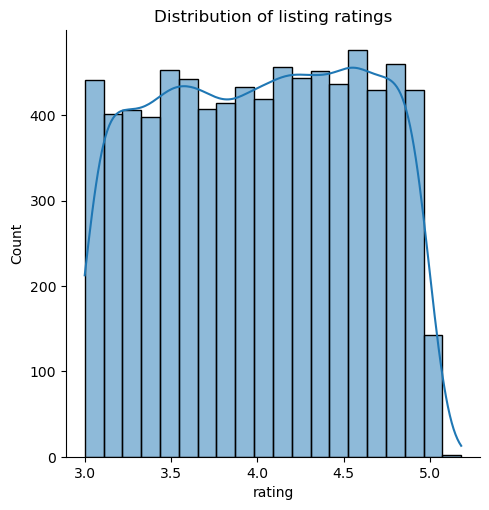

In [20]:
sns.displot(airbnb['rating'], bins=20, kde=True)
plt.title('Distribution of listing ratings')
plt.show()

In [21]:
airbnb['room_type'].value_counts() # Find number of unique values in room_type column

room_type
Entire home/apt         5120
Private room            4487
Shared room              155
Private                   89
   Shared room            71
home                      66
PRIVATE ROOM              31
Name: count, dtype: int64

- **Problem 8**: There are trailing spaces and capitalization issues with `room_type`, we need to fix this problem.

In [22]:
airbnb['room_type'].nunique() # How many values of different room_types do we have?

7

---

_Data type problems:_

- **Task 1**: Split `coordinates` into 2 columns and convert them to `float`
- **Task 2**: Remove `$` from `price` and convert it to `float`
- **Task 3**: Convert `listing_added` and `last_review` to `datetime`

_Text/categorical data problems:_

- **Task 4**: We need to collapse `room_type` into correct categories
- **Task 5**: Divide `neighbourhood_full` into 2 columns and making sure they are clean

_Data range problems:_

- **Task 6**: Make sure we set the correct maximum for `rating` column out of range values


_Dealing with missing data:_

- **Task 7**: Understand the type of missingness, and deal with the missing data in most of the remaining columns. 

---

##### **Task 1:** Replace `coordinates` with `latitude` and `longitude` columns

- `.str.replace("","")` replaces one string in each row of a column with another
- `.str.split("")` takes in a string and lets you split a column into two based on that string
- `.astype()` lets you convert a column from one type to another

In [4]:
# Remove "(" and ")" from coordinates
airbnb['coordinates'] = airbnb['coordinates'].str.replace('(', '', regex=False)
airbnb['coordinates'] = airbnb['coordinates'].str.replace(')', '', regex=False)

# Print the header of the column
airbnb['coordinates'].head()

0    40.63222, -73.93398
1    40.78761, -73.96862
2     40.7007, -73.99517
3    40.79169, -73.97498
4    40.71884, -73.98354
Name: coordinates, dtype: object

In [5]:
# Split column into two
airbnb[['latitude', 'longitude']] = airbnb['coordinates'].str.split(',', expand=True)

# Print the header and confirm new column creation
airbnb[['latitude','longitude']].head()
airbnb.dtypes

listing_id              int64
name                   object
host_id                 int64
host_name              object
neighbourhood_full     object
coordinates            object
room_type              object
price                  object
number_of_reviews       int64
last_review            object
reviews_per_month     float64
availability_365        int64
rating                float64
number_of_stays       float64
5_stars               float64
listing_added          object
latitude               object
longitude              object
dtype: object

In [ ]:
# Convert latitude and longitude to float
airbnb['latitude'] = airbnb['latitude'].astype(float)
airbnb['longitude'] = airbnb['longitude'].astype(float)
airbnb.drop(columns='coordinates', inplace=True)  # Means “do this operation directly on the original DataFrame — don’t create a copy.”

##### **Task 2:** Remove `$` from `price` and convert it to `float`

- `.str.strip()` which removes a specified string from each row in a column
- `.astype()`

In [13]:
airbnb['price'] = airbnb['price'].str.strip().str.replace('$', '', regex=False)
# Convert price to float
airbnb['price'] = airbnb['price'].astype(float)
# Calculate mean of price after conversion
airbnb['price'].mean()

150.90512217564665

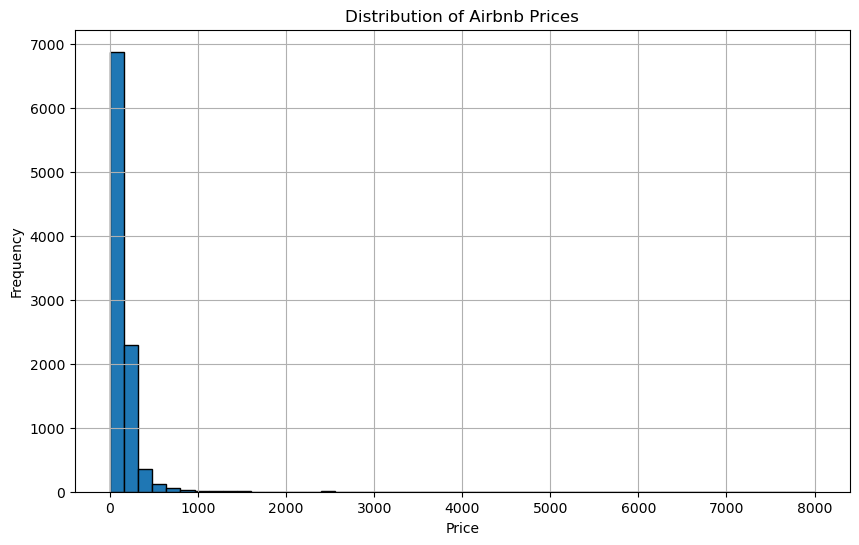

In [20]:
# Visualize distribution of prices
plt.figure(figsize=(10, 6))
plt.hist(airbnb['price'], bins=50, edgecolor='black')
plt.title('Distribution of Airbnb Prices')
plt.xlabel('Price')
plt.ylabel('Frequency')
plt.grid(True)
plt.show()

##### **Task 3:** Convert `listing_added` and `last_review` columns to `datetime`

To perform this task, we will use the following functions:

- `pd.to_datetime(format = "")`
  - `format` takes in the desired date format `"%Y-%m-%d"`

In [8]:
# Print header of two columns
airbnb[['listing_added', 'last_review']].head()

,listing_added,last_review
0,2018-06-08,2018-12-12
1,2018-12-25,2019-06-30
2,2018-08-15,NaN
3,2017-03-20,2017-09-23
4,2020-10-23,2019-06-12


In [10]:
# Convert both columns to datetime
airbnb['listing_added'] = pd.to_datetime(airbnb['listing_added'], format="%Y-%m-%d")
airbnb['last_review'] = pd.to_datetime(airbnb['last_review'], format="%Y-%m-%d")

In [ ]:
# Print header and datatypes of both columns again
airbnb[['listing_added', 'last_review']].dtypes

listing_added    datetime64[ns]
last_review      datetime64[ns]
dtype: object

##### **Task 4:** We need to collapse `room_type` into correct categories

- `.str.lower()` to lowercase all rows in a string column
- `.str.strip()` to remove all white spaces of each row in a string column
- `.replace()` to replace values in a column with another

In [21]:
# Print unique values of `room_type`
airbnb['room_type'].unique()

array(['Private room', 'Entire home/apt', 'Private', 'Shared room',
       'PRIVATE ROOM', 'home', '   Shared room      '], dtype=object)

In [23]:
# Deal with capitalized values
airbnb['room_type'] = airbnb['room_type'].str.lower()
# Deal with trailing spaces
airbnb['room_type'] = airbnb['room_type'].str.strip()
airbnb['room_type'].head()

0       private room
1    entire home/apt
2    entire home/apt
3    entire home/apt
4       private room
Name: room_type, dtype: object

In [24]:
# Replace values to 'Shared room', 'Entire place', 'Private room' and 'Hotel room' (if applicable).
airbnb['room_type'] = airbnb['room_type'].replace({
    'entire home/apt': 'Entire place',
    'entire place': 'Entire place',
    'private room': 'Private room',
    'shared room': 'Shared room',
    'hotel room': 'Hotel room',
})

##### **Task 5:** Divide `neighbourhood_full` into 2 columns and making sure they are clean

In [25]:
# Print header of column
airbnb['neighbourhood_full'].head()

0           Brooklyn, Flatlands
1    Manhattan, Upper West Side
2    Brooklyn, Brooklyn Heights
3    Manhattan, Upper West Side
4    Manhattan, Lower East Side
Name: neighbourhood_full, dtype: object

In [ ]:
# Split neighbourhood_full
airbnb[['borough', 'neighbourhood']] = airbnb['neighbourhood_full'].str.split(',', n=1, expand=True)

In [28]:
# Drop neighbourhood_full column
airbnb.drop(columns='neighbourhood_full', inplace=True)

In [29]:
# Print out unique values of borough and neighbourhood
airbnb[['borough', 'neighbourhood']].head()

,borough,neighbourhood
0,Brooklyn,Flatlands
1,Manhattan,Upper West Side
2,Brooklyn,Brooklyn Heights
3,Manhattan,Upper West Side
4,Manhattan,Lower East Side


In [30]:
# Strip white space from neighbourhood column
airbnb['neighbourhood']= airbnb['neighbourhood'].str.strip()
# Print unique values again
airbnb['neighbourhood'].head()

0           Flatlands
1     Upper West Side
2    Brooklyn Heights
3     Upper West Side
4     Lower East Side
Name: neighbourhood, dtype: object

##### **Task 6:** Make sure we set the correct maximum for `rating` column out of range values

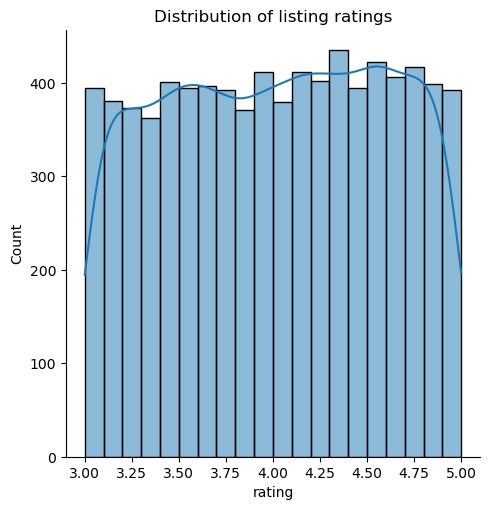

In [36]:
# Visualize the rating column again
sns.displot(airbnb['rating'], bins=20, kde=True)
plt.title('Distribution of listing ratings')
plt.show()

In [34]:
# Isolate rows of rating > 5.0
airbnb['rating']>5.0

0        False
1        False
2        False
3        False
4        False
         ...  
10014    False
10015    False
10016    False
10017    False
10018    False
Name: rating, Length: 10019, dtype: bool

In [35]:
# Drop these rows and make sure we have effected changes
airbnb = airbnb[airbnb['rating']<=5.0]

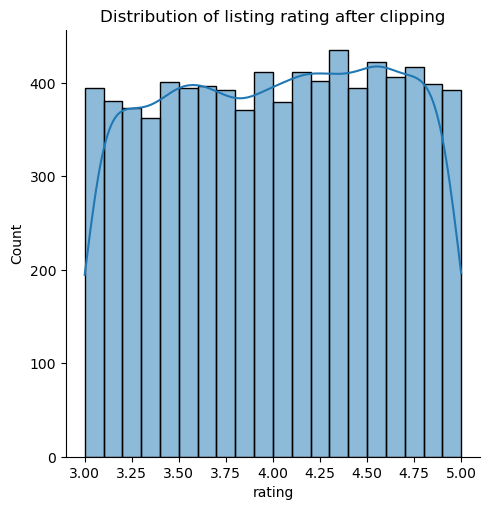

In [ ]:
# Visualize the rating column again
sns.displot(airbnb['rating'], bins=20, kde=True)
plt.title('Distribution of listing rating after dropping')
plt.show()

In [38]:
# Get the maximum
airbnb['rating'].max()

4.999561104773598

**Treating the** `rating`, `number_of_stays`, `5_stars`, `reviews_per_month` **columns**

In [ ]:
# Understand DataFrame with missing values in rating, number_of_stays, 5_stars, reviews_per_month
airbnb[airbnb['rating'].isna()].describe()

##### **Task 7:**  Looking at the missing data in the DataFrame 

 we can see that `number_of_reviews` across all missing rows is 0. We can infer that these listings have never been visited - hence could be inferred they're inactive/have never been visited. We can impute them as following:

- Set `NaN` for `reviews_per_month`, `number_of_stays`, `5_stars` to 0.
- Since a `rating` did not happen, let's keep the column as is - but create a new column named `rated` that takes in `1` if yes, `0` if no.
- We will also leave `last_review` as is.

**Hint:** You can use a dictionary like `{'reviews_per_month': 0, 'number_of_stays': 0, '5_stars': 0}` with the `fillna` function to fill missing values in specific columns.

In [ ]:
# Impute missing data
airbnb.fillna({'reviews_per_month': 0, 'number_of_stays': 0, '5_stars': 0}, inplace=True)
# Create is_rated column
airbnb['is_rated'] = airbnb['rating'].notna().astype(int)
airbnb[['reviews_per_month', 'number_of_stays', '5_stars', 'is_rated']].head()

C:\Users\hp\AppData\Local\Temp\ipykernel_3172\3423088693.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  airbnb.fillna({'reviews_per_month': 0, 'number_of_stays': 0, '5_stars': 0}, inplace=True)
C:\Users\hp\AppData\Local\Temp\ipykernel_3172\3423088693.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  airbnb['is_rated'] = airbnb['rating'].notna().astype(int)


,reviews_per_month,number_of_stays,5_stars,is_rated
0,0.70,12.0,0.609432,1
1,1.00,1.2,0.746135,1
3,0.13,6.0,0.769947,1
4,2.29,27.6,0.649383,1
5,2.22,243.6,0.743500,1


**Treating the** `price` **column**

In [42]:
# Investigate DataFrame with missing values in price
airbnb['price'].isna()

0        False
1        False
3        False
4        False
5        False
         ...  
10014    False
10015    False
10016    False
10017    False
10018    False
Name: price, Length: 7941, dtype: bool

From a common sense perspective, the most predictive factor for a room's price is the `room_type` column, so let's visualize how price varies by room type with `sns.boxplot()` which displays the following information:


<p align="center">
<img src="boxplot.png" alt = "DataCamp icon" width="80%">
</p>




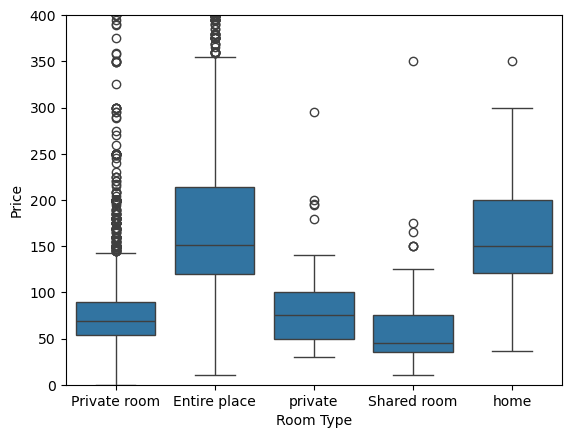

In [49]:
# Visualize relationship between price and room_type
sns.boxplot(x = 'room_type', y = 'price', data = airbnb)
plt.ylim(0, 400)
plt.xlabel('Room Type')
plt.ylabel('Price')
plt.show()

In [46]:
# Get median price per room_type
median_prices = airbnb.groupby('room_type')['price'].median()
median_prices

room_type
Entire place    151.0
Private room     69.0
Shared room      45.0
home            150.0
private          75.0
Name: price, dtype: float64

In [ ]:
# Impute price based on conditions
for room in airbnb['room_type'].unique():
    airbnb.loc[airbnb['room_type'] == room, 'price'] = airbnb.loc[airbnb['room_type']== room, 'price'].fillna(median_prices[room])

In [51]:
# Confirm price has been imputed
airbnb['price'].isna().sum()

0

### What's still to be done?

- Values that do not make any sense *(for example: are there values of `last_review` that older than `listing_added`? Are there listings in the future?*)
- Presence of duplicates values - and how to deal with them?
##### **Task 8:** Do we have consistent date data?

In [52]:
# Are there reviews in the future?
airbnb[airbnb['last_review'] > pd.Timestamp.today()]

,listing_id,name,host_id,host_name,room_type,price,number_of_reviews,last_review,reviews_per_month,availability_365,rating,number_of_stays,5_stars,listing_added,latitude,longitude,borough,neighbourhood,rated,is_rated


In [53]:
# Are there listings in the future?
airbnb[airbnb['listing_added'] > pd.Timestamp.today()]

,listing_id,name,host_id,host_name,room_type,price,number_of_reviews,last_review,reviews_per_month,availability_365,rating,number_of_stays,5_stars,listing_added,latitude,longitude,borough,neighbourhood,rated,is_rated


In [55]:
# Drop these rows since they are only 4 rows
airbnb = airbnb[airbnb['last_review'] <= pd.Timestamp.today()]
airbnb = airbnb[airbnb['listing_added'] <= pd.Timestamp.today()]

In [56]:
# Are there any listings with listing_added > last_review
airbnb[airbnb['listing_added']>airbnb['last_review']]

,listing_id,name,host_id,host_name,room_type,price,number_of_reviews,last_review,reviews_per_month,availability_365,rating,number_of_stays,5_stars,listing_added,latitude,longitude,borough,neighbourhood,rated,is_rated
4,22986519,Bedroom on the lively Lower East Side,154262349,Brooke,Private room,160.0,23,2019-06-12,2.29,102,3.822591,27.6,0.649383,2020-10-23,40.71884,-73.98354,Manhattan,Lower East Side,1,1
50,20783900,Marvelous Manhattan Marble Hill Private Suites,148960265,Randy,Private room,93.0,7,2018-10-06,0.32,0,4.868036,8.4,0.609263,2020-02-17,40.87618,-73.91266,Manhattan,Marble Hill,1,1
60,1908852,Oversized Studio By Columbus Circle,684629,Alana,Entire place,189.0,7,2016-05-06,0.13,0,4.841204,8.4,0.725995,2017-09-17,40.77060,-73.98919,Manhattan,Upper West Side,1,1
124,28659894,Private bedroom in prime Bushwick! Near Trains!!!,216235179,Nina,Private room,55.0,4,2019-04-12,0.58,358,4.916252,4.8,0.703117,2020-08-23,40.69988,-73.92072,Brooklyn,Bushwick,1,1
511,33619855,Modern & Spacious in trendy Crown Heights,253354074,Yehudis,home,150.0,6,2019-05-27,2.50,148,3.462432,7.2,0.610929,2020-10-07,40.66387,-73.93840,Brooklyn,Crown Heights,1,1
521,25317793,Awesome Cozy Room in The Heart of Sunnyside!,136406167,Kara,Private room,65.0,22,2019-06-11,1.63,131,4.442485,26.4,0.722388,2020-10-22,40.74090,-73.92696,Queens,Sunnyside,1,1


In [57]:
# Drop these rows since they are only 2 rows
airbnb = airbnb[airbnb['listing_added'] <= airbnb['last_review']]

##### **Task 9:** Let's deal with duplicate data

There are two notable types of duplicate data:

- Identical duplicate data across all columns
- Identical duplicate data cross most or some columns

To diagnose, and deal with duplicate data, we will be using the following methods and functions:

- `.duplicated(subset = , keep = )`
  - `subset` lets us pick one or more columns with duplicate values.
  - `keep` returns lets us return all instances of duplicate values.
- `.drop_duplicates(subset = , keep = )`
  

In [ ]:
# Find duplicates (1st type of duplication)
airbnb.duplicated().sum()
# duplicatin based (2nd type of duplication)
airbnb[airbnb.duplicated(subset=['listing_id'], keep=False)]

12

In [ ]:
# Remove identical duplicates
airbnb = airbnb.drop_duplicates()
# remove base on some duplication
airbnb = airbnb.drop_duplicates(subset=['listing_id'], keep='first')

In [ ]:
# Find non-identical duplicates
duplicates = airbnb[airbnb.duplicated(subset=['listing_id'], keep=False)]
duplicates.drop_duplicates()

To treat identical duplicates across some columns, we will chain the `.groupby()` and `.agg()` methods where we group by the column used to find duplicates (`listing_id`) and aggregate across statistical measures for `price`, `rating` and `list_added`. The `.agg()` method takes in a dictionary with each column's aggregation method - we will use the following aggregations:

- `mean` for `price` and `rating` columns
- `max` for `listing_added` column
- `first` for all remaining column

*A note on dictionary comprehensions:*

Dictionaries are useful data structures in Python with the following format
`my_dictionary = {key: value}` where a `key` is mapped to a `value` and whose `value` can be returned with `my_dictionary[key]` - dictionary comprehensions allow us to programmatically create dicitonaries using the structure:

```
{x: x*2 for x in [1,2,3,4,5]} 
{1:2, 2:4, 3:6, 4:8, 5:10}
```

In [ ]:
# Get column names from airbnb
cols = airbnb.columns


In [ ]:
# Create dictionary comprehension with 'first' as value for all columns not being aggregated
agg_dict = {'price': 'mean', 'rating': 'mean', 'listing_added': 'max'}
agg_dict.update({col: 'first' for col in cols if col not in agg_dict})

In [ ]:
# Remove non-identical duplicates
airbnb = airbnb.groupby('listing_id', as_index=False).agg(agg_dict)

In [ ]:
# Make sure no duplication happened
print("Remaining duplicaties:", airbnb['listing_id'].duplicated().sum())

In [ ]:
# Print header of DataFrame
airbnb.head()

## **Q&A**

### Take home question

Try to answer the following questions about the dataset:

- What is the average price of listings by borough? Visualize your results with a bar plot!
- What is the average availability in days of listings by borough? Visualize your results with a bar plot!
- What is the median price per room type in each borough? Visualize your results with a bar plot!
- Visualize the number of listings over time.

**Functions that should/could be used:**
- `.groupby()` and `.agg(})`
- `sns.barplot(x = , y = , hue = , data = )`
- `sns.lineplot(x = , y = , data = )`
- `.dt.strftime()` for extracting specific dates from a `datetime` column
